# Семинар № 8. Библиотека pandas (продолжение)

# Задача
В рамках выполнения домашнего проекта вам придётся анализировать выбранный набор данных.
На предыдущих семинарах мы обсуждали, как можно провести предварительный анализ и выполнить предобработку.

Теперь настало время приступить к следующему этапу - анализу данных и построению гипотез.

Снова рассмотрим набор данных про пассажиров Титаника. Но на этот раз данные разбиты на 2 таблицы.

Ваша задача - объединить набор данных в одну таблицу и выполнить ее анализ, построив гипотезы:
1. Построить и доказать/опровергнуть простые гипотезы по отдельным признакам.
2. Заполнить пропуски в данных.
3. Понять, можно ли получить новые признаки из существующих? 
4. Построить и доказать/опровергнуть гипотезы о зависимостях разных признаков.

### Решение

Сначала загрузим оба файла и посмотрим на них:

In [ ]:
from google.colab import output

In [ ]:
!wget -O "titanic_corrupted_1.csv" "https://raw.githubusercontent.com/legas377/TestRepository/main/titanic_corrupted_1.csv"
!wget -O "titanic_corrupted_2.csv" "https://raw.githubusercontent.com/legas377/TestRepository/main/titanic_corrupted_2.csv"
output.clear()

In [ ]:
import pandas as pd

Считываем наборы данных в специальные объекты `df1` и `df2` - датафреймы:

In [ ]:
df1 = pd.read_csv('titanic_corrupted_1.csv')
df2 = pd.read_csv('titanic_corrupted_2.csv')

Смотрим содержимое наборов данных:

In [ ]:
df1.head(5)

,Index,PassEngEr_Id,PclaSS;-,NAME,SEX
0,0,892.0,3.0,Kelly; Mr. James,male
1,1,893.0,3.0,Wilkes; Mrs. James (Ellen Needs),female
2,2,894.0,NaN,Myles; Mr. Thomas Francis,NaN
3,3,895.0,3.0,NaN,male
4,4,896.0,3.0,Hirvonen; Mrs. Alexander (Helga E Lindqvist),female


In [ ]:
df2.head(5)

,Index,age .,Sib_Sp,PaRch__,TickEt,Fare,cabin,Embarked::
0,0,34.5,0,0,330911,7.8292,NaN,Q
1,1,47.0,1,0,363272,7.0000,NaN,S
2,2,NaN,0,0,240276,9.6875,NaN,Q
3,3,27.0,0,0,315154,8.6625,NaN,S
4,4,22.0,1,1,3101298,12.2875,NaN,S


Мы видим, что у этих таблиц есть что-то общее. Какая-то колонка присутствует в обоих наборах данных. Какая?

**Введите название колонки**

В такой ситуации можно очень просто "собрать" из исходных датасетов один - выполнить merge:

In [ ]:
df = df1.merge(df2)
print(df.head(10))

   Index  PassEngEr_Id  PclaSS;-  ...     Fare cabin  Embarked::
0      0         892.0       3.0  ...   7.8292   NaN           Q
1      1         893.0       3.0  ...   7.0000   NaN           S
2      2         894.0       NaN  ...   9.6875   NaN           Q
3      3         895.0       3.0  ...   8.6625   NaN           S
4      4         896.0       3.0  ...  12.2875   NaN           S
5      5         897.0       3.0  ...   9.2250   NaN           S
6      6         898.0       3.0  ...   7.6292   NaN           Q
7      7         899.0       2.0  ...      NaN   NaN           S
8      8         900.0       3.0  ...   7.2292   NaN           C
9      9           NaN       3.0  ...  24.1500   NaN           S

[10 rows x 12 columns]


Теперь нам не нужна колонка Index - pandas автоматически создаёт индекс. Можно её удалить:

In [ ]:
df = df.drop(['Index'], axis=1)
print(df.head(10))

   PassEngEr_Id  PclaSS;-  ... cabin Embarked::
0         892.0       3.0  ...   NaN          Q
1         893.0       3.0  ...   NaN          S
2         894.0       NaN  ...   NaN          Q
3         895.0       3.0  ...   NaN          S
4         896.0       3.0  ...   NaN          S
5         897.0       3.0  ...   NaN          S
6         898.0       3.0  ...   NaN          Q
7         899.0       2.0  ...   NaN          S
8         900.0       3.0  ...   NaN          C
9           NaN       3.0  ...   NaN          S

[10 rows x 11 columns]


Теперь можно работать с этими данными, как раньше.

## Повторение прошлого семинара

Выводим названия колонок:

In [ ]:
df.columns

Index(['PassEngEr_Id', 'PclaSS;-', 'NAME', 'SEX', 'age .', 'Sib_Sp', 'PaRch__',
       'TickEt', 'Fare', 'cabin', 'Embarked::'],
      dtype='object')

In [ ]:
# Предобрабатываем названия колонок
def column_name_preprocess(col_name):
    for char in ['_', ';', '-', ' ', '.', ':']:
        col_name = col_name.replace(char, '')
    return col_name

column_names = df.columns
df.columns = [column_name_preprocess(col_name).title() for col_name in column_names]
print(df.columns)

Index(['Passengerid', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Теперь давайте вспомним, какие типы были у каждой колонки.

In [ ]:
df.dtypes

Passengerid    float64
Pclass         float64
Name            object
Sex             object
Age            float64
Sibsp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Построим различные статистические характеристики для числовых признаков:

In [ ]:
df.describe()

,Passengerid,Pclass,Age,Sibsp,Parch,Fare
count,376.000000,376.000000,295.000000,418.000000,418.000000,375.000000
mean,1101.808511,2.271277,30.271763,0.447368,0.392344,34.457245
std,121.234431,0.842741,13.904076,0.896760,0.981429,55.089213
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,997.750000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,13.862500
75%,1207.250000,3.000000,39.000000,1.000000,0.000000,30.943750
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Вспомним, какие признаки являются категориальными.

In [ ]:
df.nunique()

Passengerid    376
Pclass           3
Name           376
Sex              2
Age             74
Sibsp            7
Parch            8
Ticket         363
Fare           160
Cabin           76
Embarked         3
dtype: int64

Мы видим, что логично считать категориальными признаками Pclass, Sex, Sibsp, Parch, Embarked - потому что в данных колонках присутствует не много различных значений (меньше 50).

Теперь давайте вспомним, в каких колонках содержатся пропуски:

In [ ]:
df.isna().any()

Passengerid     True
Pclass          True
Name            True
Sex             True
Age             True
Sibsp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

Мы видим, что пропущены значения в колонках Passengerid, Pclass, Name, Sex, Age, Fare, Cabin.

## Анализ числовых признаков

Проведём анализ существующих числовых признаков. Для этого построим соответствующие графики.

### Passengerid

Здесь присутствует много различных значений. Поэтому давайте для начала построим линейный график.

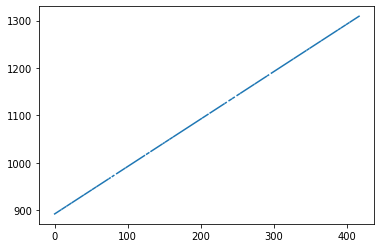

In [ ]:
df['Passengerid'].plot()

Мы видим, что данные меняются линейно. Это логично, потому что Passengerid - это порядковый номер пассажира.

### Pclass

Pclass - это категориальный признак, принимающий небольшое количество значений (3). Для таких признаков удобно строить гистограмму.

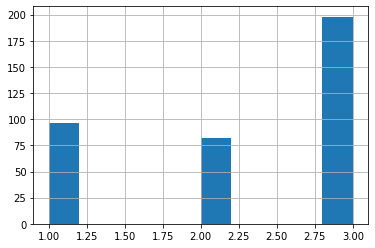

In [ ]:
df['Pclass'].hist()

Мы видим, что пассажиров класса 3 оказалось намного больше, чем пассажиров классов 1 и 2. Т.е. верной оказалась гипотеза: "В титанике было больше пассажиров класса 3".

### Age

Эта колонка отображает возраст. Она тоже имеет большое количество значений. Давайте построим линейный график:

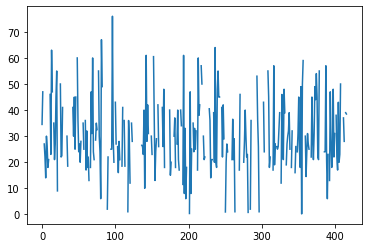

In [ ]:
df['Age'].plot()

Мы видим, что этот график особой пользы нам не приносит. Нам было бы интересно узнать, например, каких пассажиров больше: молодых или пожилых.

По линейному графику видно, что больше точек в середине отрезка. Т.е. 20-40 лет.
Сформулируем следующую гипотезу: "На Титанике большинство пассажиров были от 20 до 30 лет".

Для проверки этой гипотезы можно построить гистограмму. Но в наших данных очень много людей с разными возрастами. Поэтому логично их объединить в группы:

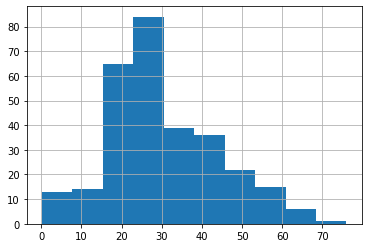

In [ ]:
df['Age'].hist(bins=10)

Мы видим, что на корабле было не так много пожилых и молодых людей. Основная часть пассажиров - это люди 15-30 лет.
Таким образом, наша гипотеза подтверждена, но частично (в первоначальной гипотезе мы не учли возраст 15-20 лет).

### Sibsp

Sibsp - это количество братьев, сестёр и супругов на борту.Этот параметр можно также считать категориальным, поскольку он принимает всего 7 разных значений. Давайте и для него построим гистограмму и проверим, верна ли гипотеза: "На борту большинство пассажиров имели хотя бы одного супруга, брата или сестру".

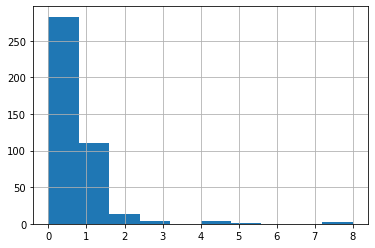

In [ ]:
df['Sibsp'].hist(bins=10)

Мы видим, что больше всего на Титанике было одиноких пассажиров. Т.е. наша гипотеза не подтвердилась.

### Parch

Этот признак показывает количество родителей и детей на корабле. Его анализировать можно так же, как и предыдущий признак:

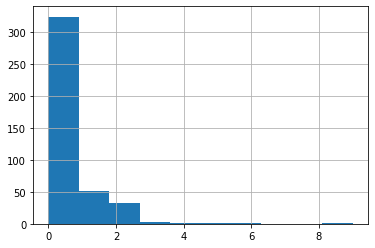

In [ ]:
df['Parch'].hist()

И здесь мы видим, что большинство пассажиров Титаника не имело родителей и детей на корабле.

###  Fare

Fare - это стоимость билета очередного пассажира. Здесь можно так же построить обычный линейный график:

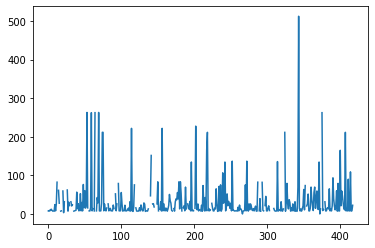

In [ ]:
df['Fare'].plot()

Мы видим по графику, что стоимость принимает различные значения. Но есть очень много пассажиров с небольшой ценой билета, а также есть пассажиры, заплатившие больше всего денег. Поэтому логично выдвинуть гипотезу: "Пассажиры в основном заплатили менее 100$ за билет". Для её проверки можно построить гистограмму:

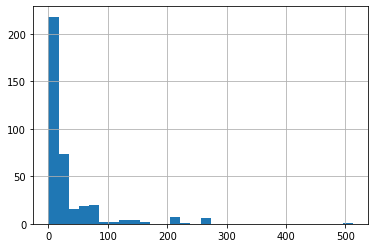

In [ ]:
df['Fare'].hist(bins=30)

Мы видим, что большинство пассажиров отдало не так много денег за билет. Наша гипотеза подтверждена.

Наверное, это логично. Известно, что на корабле большинство пассажиров ехали в третьем классе. Наверное, между этими значениями есть какая-то связь... Но об этом - позже.

## Анализ категориальных признаков

Теперь давайте отдельно проанализируем категориальные признаки, не являющиеся числовыми. Какой тип графиков подойдет для них?

Для них подойдёт **гистограмма**.

### Sex

Эта колонка определяет пол пассажира. Давайте попробуем построить гистограмму по ней:

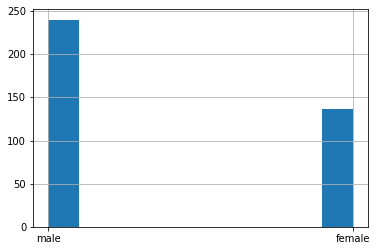

In [ ]:
df['Sex'].hist()

Мы видим, что мужчин на Титанике было больше.

### Embarked

Этот признак отвечает за название порта, где пассажир садился на корабль (C = Cherbourg, Q = Queenstown, S = Southampton). Давайте построим и его гистограмму:

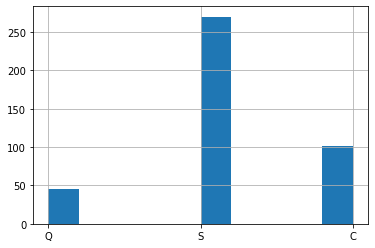

In [ ]:
df['Embarked'].hist()

Мы видим, что больше всего пассажиров было из Southampton.

## Заполнение пропусков. interpolate, fillna, apply.

Как мы помним, пропуски присутствуют в признаках Passengerid, Pclass, Name, Sex, Age, Fare, Cabin.

Рассмотрим каждый из этих признаов в отдельности и подумаем, как стоит заполнять пропуски в каждом признаке.

### Passengerid

Как мы видели ранее на графике, значения индекса меняются линейно. Поэтому можно провести линейную интерполяцию.

Работая с numpy нам приходилось использовать linspace и вручную искать пропуски.

В pandas это делается с помощью одного метода: interpolate.



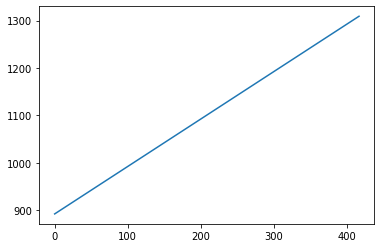

In [ ]:
df['Passengerid'] = df['Passengerid'].interpolate(method='linear')
df['Passengerid'].plot()

### Pclass

Это - категориальный признак. Как мы помним, в данном случае следует заполнять пропуски наиболее частым значением. По графику (см. выше) видно, что это значение равно 3.

Чтобы заполнить пропуски каким-то одним значением можно использовать fillna:

In [ ]:
df['Pclass'] = df['Pclass'].fillna(3)
df['Pclass'].isna().any()

False

Мы видим, что пропусков в этой колонке больше нет.

### Sex

Мы говорили ранее, что пол можно заполнять исходя из имени: если в имени встречается Mrs. или Miss - значит пол "женский", иначе пол - "Мужской".

Ранее мы это могли сделать с помощью map.

В pandas есть свой аналог map - функция apply. Она обладает более широкими возможностями, например, может применяться как к строкам, так и к столбцам.

Таким образом, apply работает следующим образом:

1. Итерируется по **всем** строкам или столбцам (как мы ему скажем).
2. Для каждой строки или столбца выполняет указанное преобразование.
3. Результат возвращает в виде DataFrame или Series.

Для того, чтобы выполнить указанное преобразование, давайте вспомним функцию, которая по имени получает пол:

In [ ]:
def get_sex_from_name(name):
  if pd.isnull(name):
    return None
  elif 'Mr.' in name:
      return 'male'
  elif 'Mrs.' in name or 'Miss.' in name:
      return 'female'
  else:
      return None

Теперь давайте поймём, как написать функцию, которая по одной строке сформирует название пола:


In [ ]:
def get_sex_for_row(row):
  sex = row['Sex']
  if not pd.isnull(sex):
    return sex
  else:
    return get_sex_from_name(row['Name'])

Теперь применяем**(apply)** нашу функцию к **каждой** строке.

In [ ]:
new_sex = df.apply(get_sex_for_row, axis=1)

In [ ]:
print(df['Sex'])

0        male
1      female
2         NaN
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417       NaN
Name: Sex, Length: 418, dtype: object


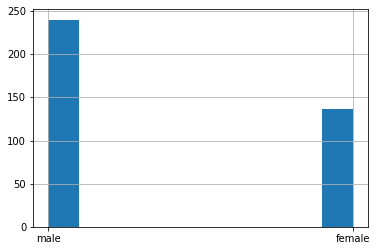

In [ ]:
df['Sex'].hist()

In [ ]:
new_sex

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      None
Length: 418, dtype: object

In [ ]:
df['Sex'] = new_sex.fillna('male')

In [ ]:
print(df['Sex'])

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object


### Age

Мы можем заполнить возраст средним.

Однако по гистограмме видно, что больше всего людей имели возраст ниже среднего (15-30 лет).

Поэтому логично заменить пропуски в этой колонке заполнить каким-то значением из этого периода. Давайте заполним значением 25:

In [ ]:
df['Age'] = df['Age'].fillna(25)

### Fare

Это - цена билета.

Тут можно было бы заполнить просто средним.
Однако, у нас было предположение, что цена билета зависит от класса пассажира.

Давайте это проверим - построим гистограммы распределения цен для каждого класса.

Сначала вспомним, как выбрать данные по какому-то классу:

In [ ]:
df.query('Pclass==1')

,Passengerid,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
12,904.0,1.0,Snyder; Mrs. John Pillsbury (Nelle Stevenson),female,23.0,1,0,21228,82.2667,B45,S
14,906.0,1.0,Chaffee; Mrs. Herbert Fuller (Carrie Constance...,female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
20,912.0,1.0,Rothschild; Mr. Martin,male,55.0,1,0,PC 17603,59.4000,NaN,C
22,914.0,1.0,Flegenheim; Mrs. Alfred (Antoinette),female,25.0,0,0,PC 17598,31.6833,NaN,S
23,915.0,1.0,Williams; Mr. Richard Norris II,male,21.0,0,1,PC 17597,NaN,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
403,1295.0,1.0,Carrau; Mr. Jose Pedro,male,17.0,0,0,113059,47.1000,NaN,S
404,1296.0,1.0,NaN,male,43.0,1,0,17765,27.7208,D40,C
407,1299.0,1.0,Widener; Mr. George Dunton,male,50.0,1,1,113503,211.5000,C80,C
411,1303.0,1.0,Minahan; Mrs. William Edward (Lillian E Thorpe),female,37.0,1,0,19928,90.0000,C78,Q


Теперь давайте построим гистограммы для каждого класса:

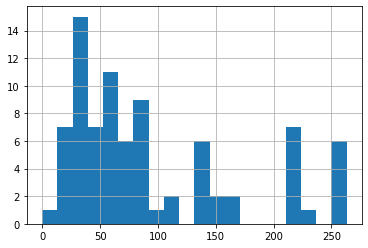

In [ ]:
df.query('Pclass==1')['Fare'].hist(bins=20)

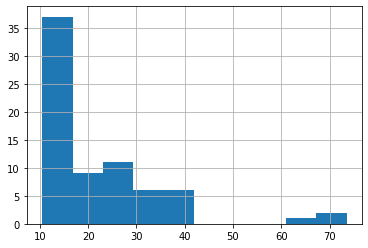

In [ ]:
df.query('Pclass==2')['Fare'].hist()

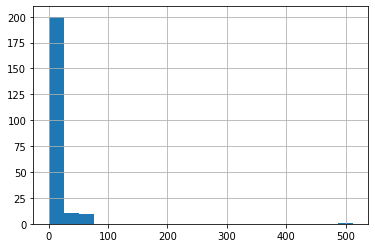

In [ ]:
df.query('Pclass==3')['Fare'].hist(bins=20)

Мы видим, что в третьем классе есть несколько значений с очень большой ценой - это выбросы, которые возникли, когда мы заполняли значение класса. Их можно отбросить:

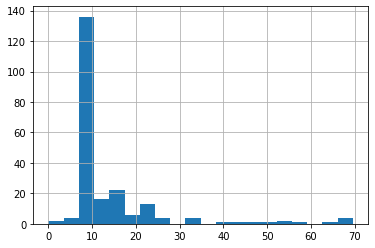

In [ ]:
df.query('Pclass==3').query('Fare<100')['Fare'].hist(bins=20)

Мы видим, что в 3 классе преобладают билеты стоимостью до 10\$, во втором - от 10\$ до 70\$.

Таким образом, связь между стоимостью билета и классом кабины есть.

Поэтому логично заполнять пропуски медианой по соответствующим классам с помощью apply.

Посчитаем медианы:

In [ ]:
import numpy as np

l1 = np.array([1, 2, 30, 40, 100000000000000000000000])
l2 = np.array([1, 2, 30, 40, 100000000000000000000000])

np.median(l1), np.mean(l1)

(30.0, 2e+22)

In [ ]:
median1 = df.query('Pclass==1')['Fare'].median()
print(median1)

71.2833


In [ ]:
median2 = df.query('Pclass==2')['Fare'].median()
print(median2)

15.875


In [ ]:
median3 = df.query('Pclass==3').query('Fare<100')['Fare'].median()
print(median3)

8.05


Теперь напишем функцию, которая по текущей строке заполнит пропущенное значение Fare: 

In [ ]:
def get_fare_from_row(row):
  fare = row['Fare']
  if not pd.isna(fare):
    return fare
  else:
    pclass = row['Pclass']
    if pclass==1:
      return median1
    elif pclass==2:
      return median2
    else:
      return median3

Теперь заполним пропуски в колонке Fare:

In [ ]:
df['Fare'] = df.apply(get_fare_from_row, axis=1)

### Проверка корректности заполнения пропусков

Теперь давайте проверим, все ли пропуски мы заполнили

In [ ]:
df.isna().any()

Passengerid    False
Pclass         False
Name            True
Sex            False
Age            False
Sibsp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

Мы видим, что пропуски остались только в колонке Name и Cabin. Но мы уже обсуждали, что эти колонки не нужны. Их можно или отбросить, или оставить с пропусками и не учитывать далее.

## Создание новых признаков

Часто в процессе анализа данных мы замечаем, что какие-то колонки связаны. И мы можем получить какую-то новую информацию по уже существующим данным.

В этом случае мы можем создать новую колонку, значения которой получаются путём применения apply к существующему датафрейму.

Например, в нашем датасете можно было заметить, что есть 2 связных признака:
1. Sibsp - количество братьев, сестёр и супругов.
2. Parch - количество родителей и детей.

Логично было бы также иметь дополнительную информацию о суммарном количестве родственников:

In [ ]:
df['Relatives'] = df.apply(lambda row: row['Sibsp'] + row['Parch'], axis=1)
df

,Passengerid,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,892.0,3.0,Kelly; Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893.0,3.0,Wilkes; Mrs. James (Ellen Needs),female,47.0,1,0,363272,7.0000,NaN,S,1
2,894.0,3.0,Myles; Mr. Thomas Francis,male,25.0,0,0,240276,9.6875,NaN,Q,0
3,895.0,3.0,NaN,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896.0,3.0,Hirvonen; Mrs. Alexander (Helga E Lindqvist),female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,Spector; Mr. Woolf,male,25.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306.0,1.0,Oliva y Ocana; Dona. Fermina,female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307.0,3.0,Saether; Mr. Simon Sivertsen,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308.0,3.0,Ware; Mr. Frederick,male,25.0,0,0,359309,8.0500,NaN,S,0


Проанализируем значения в получившейся колонке, проверив гипотезу: "На Титанике большинство пассажиров не имело родственников". Она возникает из того, что ранее мы выяснили, что гистограммы для колонок Sibsp и Parch показывают, что большинство пассажиров не имеют ни братьев, сестер, супругов, ни родителей или детей.

Строим гистограмму:

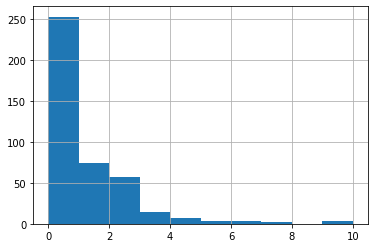

In [ ]:
df['Relatives'].hist()

Наша гипотеза оказалась верной.

Действительно, большинство пассажиров были на Титанике без родственников.

# Задача


Рассмотрим, как следует выполнять анализ выбранных вами наборов данных.

1. Если не была выполнена предобработка - возвращайтесь к предыдущему семинару и выполняйте её.
2. Если в ваших данных несколько файлов - объедините их все в один (подумайте, по каким колонкам строить объединение) (pandas.merge()). Выполните предобработку уже для полного набора данных.
3. Подумайте, есть ли в вашем наборе данных ненужные колонки. Если есть - удалите их (pandas.drop()). При удалении колонок обязательно нужно объяснить, почему колонка не нужна.
4. Проведите анализ **каждого** числового признака. Сформулируйте простые гипотезы о возможных значениях этого признака. Для доказательства гипотез постройте соответствующие графики (с помощью plot, hist).
5. Проведите анализ **каждого** категориального признака. Сформулируйте простые гипотезы о возможных значениях этого признака. Для доказательства гипотез постройте соответствующие графики (с помощью hist).
6. Выполните заполнение пропущенных значений (с помощью pandas.interpolate(), pandas.fillna() или pandas.apply()).
7. Подумайте, какие новые признаки можно получить по существующему датасету. Добавьте соответствующие признаки, проведите их анализ, постройте простую гипотезу о его распределении, графически докажите её.